[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/francisco-ortin/data-science-course/blob/main/deep-learning/mlp/xor_perceptron.ipynb)
[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

# XOR problem

The XOR problem is a classic problem in the field of artificial neural networks. It is a problem that is not linearly separable, which means that it cannot be solved by a single layer perceptron. In this notebook, we will see how this is actually true.

In [6]:
# make sure the required packages are installed
%pip install pandas numpy seaborn matplotlib scikit-learn keras tensorflow --quiet
# if running in colab, install the required packages and copy the necessary files
directory='data-science-course/deep-learning/mlp'
if get_ipython().__class__.__module__.startswith('google.colab'):
    !git clone https://github.com/francisco-ortin/data-science-course.git  2>/dev/null
    !cp --update {directory}/*.py .
    !mkdir -p img data
    !cp {directory}/img/* img/.

from keras.src.layers import Dense
from keras.src.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
import numpy as np

from utils import show_history

Note: you may need to restart the kernel to use updated packages.


## Dataset

We define the data for the XOR problem.

In [7]:
# Two independent variables of the XOR problem
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
# Dependent variable (XOR value)
y = np.array([[0], [1], [1], [0]])

## Perceptron

We create a perceptron with a single layer and a single neuron. We use the sigmoid activation function.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 677ms/step - loss: 0.8009 - accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7645 - accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7375 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7205 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7129 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 12ms/s

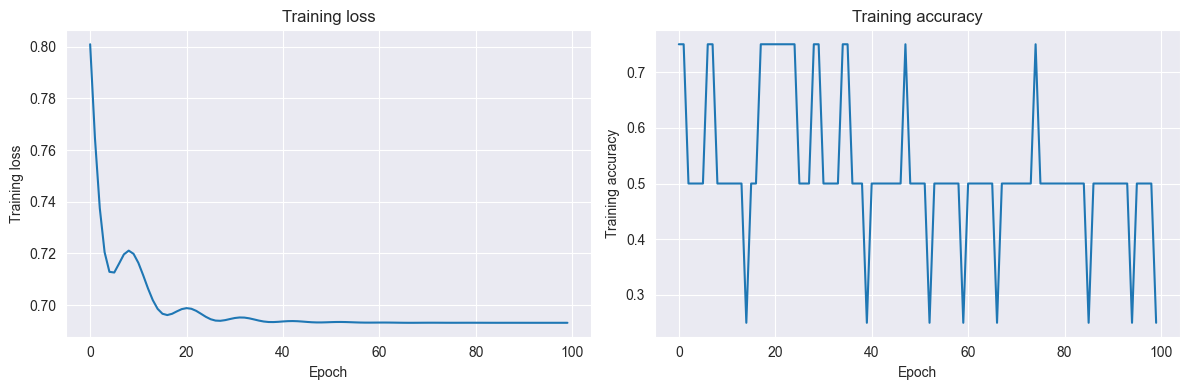

In [8]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.summary()  # params=3 (2 weights for inputs + bias)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])
history = model.fit(X, y, epochs=100)
# show the training history
show_history(history, loss_label='Training loss', accuracy_label='Training accuracy')

## Prediction and evaluation

Let's how the model predicts the XOR values. Then, we will evaluate the model.

In [11]:
prediction_probabilities = model.predict(X, verbose=0)
prediction = np.vectorize(lambda x: 1 if x > 0.5 else 0)(prediction_probabilities)

print(f"Actual values:\n{y}")
print(f"Predicted values:\n{prediction}")
print(f"Accuracy: {accuracy_score(y, prediction):.4f}.")
print(f"F1-score: {f1_score(y, prediction):.4f}.")

Actual values:
[[0]
 [1]
 [1]
 [0]]
Predicted values:
[[1]
 [1]
 [0]
 [1]]
Accuracy: 0.2500.
F1-score: 0.4000.


## ✨ Questions ✨ 

1. What is happening?
2. Why?

### Answers

*Write your answers here.*

1. The Perceptron NN is not able to solve the problem.
2. Tt is non-linearly separable problem and Perceptron can only solve linear problems (the same as Logistic Regression).